# Problem 1: Line Plot
- In this problem, we will plot some daily weather data from a NOAA station in Millbrook, NY. A full description of this dataset is available at: https://www.ncdc.noaa.gov/data-access/land-based-station-data

- The cell below uses pandas to download the data and populate a bunch of numpy arrays (t_daily_min, t_daily_max, etc.) Run the cell and then use the numpy arrays to try to re-create the plot you see.

In [1]:
import pooch

POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64",
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split("\n")
headers = lines[1].split(" ")

dframes = []
for year in range(2016, 2019):
    fname = f"CRND0103-{year}-NY_Millbrook_3_W.txt"
    df = pd.read_csv(
        POOCH.fetch(fname),
        parse_dates=[1],
        names=headers,
        header=None,
        sep="\s+",
        na_values=[-9999.0, -99.0],
    )
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index("LST_DATE")
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_36692\1508269097.py:33: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


In [2]:
units = lines[2].split(" ")
for name, unit in zip(headers, units):
    print(f"{name}: {unit}")

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


In [67]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_36692\1879828998.py:27: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


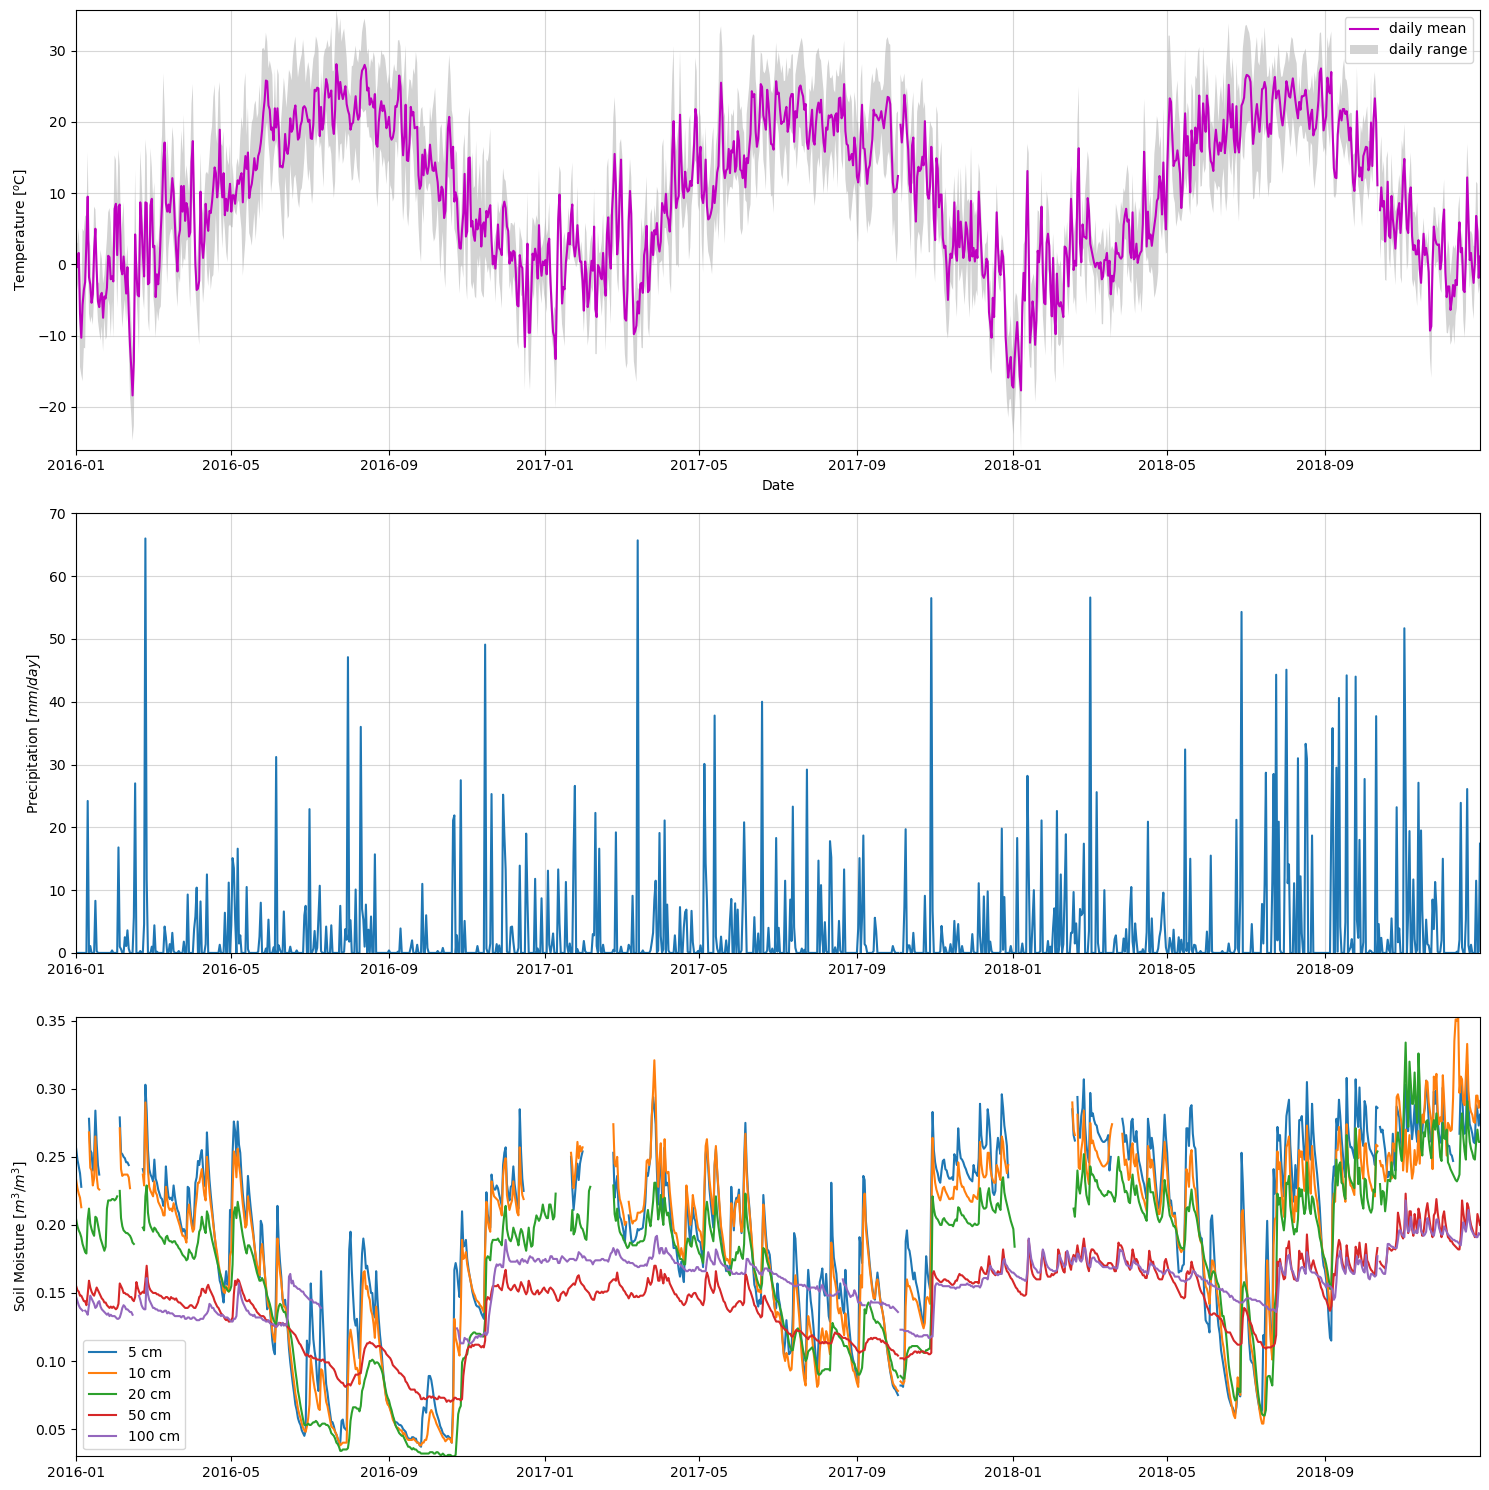

In [61]:
fig, ax = plt.subplots(figsize=(15, 15), nrows=3, constrained_layout=True)

ax[0].plot(date, t_daily_mean, color="m", label="daily mean")
ax[0].fill_between(
    date, t_daily_max, t_daily_min, facecolor="lightgray", label="daily range"
)
ax[0].set(xlabel="Date", ylabel=r"Temperature [$^o$C]")
ax[0].grid(which="major", alpha=0.5)
ax[0].margins(0)
ax[0].legend(loc="upper right")

ax[1].plot(date, p_daily_calc)
ax[1].margins(0)
ax[1].set_ylim(0, 70)
ax[1].grid(which="major", alpha=0.5)
ax[1].set_ylabel("Precipitation [$mm/day$]")

ax[2].plot(date, soil_moisture_5, label="5 cm")
ax[2].plot(date, soil_moisture_10, label="10 cm")
ax[2].plot(date, soil_moisture_20, label="20 cm")
ax[2].plot(date, soil_moisture_50, label="50 cm")
ax[2].plot(date, soil_moisture_100, label="100 cm")
ax[2].set_ylabel(r"Soil Moisture [$m^3/m^3$]")
ax[2].margins(0)
ax[2].legend(loc="lower left")

fig.tight_layout()

# Problem 2: Contour Plots
Now we will visualize some global temperature data from the NCEP-NCAR atmospheric reanalysis.

In [62]:
import xarray as xr

ds_url = "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods"
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

In [74]:
np.min(temp), np.max(temp)

(-72.36, 42.47)

In [182]:
mean_temp = np.nanmean(temp, axis=1)
mean_temp

array([ -0.7618688 ,  -0.75108767,  -0.7775459 ,  -1.1487961 ,
        -1.5122341 ,  -1.4606196 ,  -0.7375992 ,   0.62005806,
         2.096308  ,   3.7094326 ,   5.4722447 ,   7.5087047 ,
         8.678391  ,   9.722922  ,  10.205161  ,  11.202507  ,
        12.53412   ,  12.956203  ,  13.899902  ,  14.713653  ,
        15.351048  ,  17.002192  ,  18.64683   ,  19.853392  ,
        20.912764  ,  22.375631  ,  23.142456  ,  23.467974  ,
        23.774797  ,  24.743185  ,  25.95688   ,  26.654276  ,
        27.671362  ,  28.347923  ,  28.52204   ,  28.71907   ,
        28.948912  ,  28.739222  ,  28.263968  ,  27.789694  ,
        27.637457  ,  27.586205  ,  27.414484  ,  27.3561    ,
        27.154434  ,  26.952353  ,  26.4198    ,  26.030787  ,
        26.041464  ,  26.099798  ,  25.99235   ,  25.850891  ,
        25.48834   ,  24.930632  ,  24.249796  ,  23.589798  ,
        22.943079  ,  22.311308  ,  21.49428   ,  20.599485  ,
        19.66834   ,  18.629276  ,  17.50089   ,  16.42

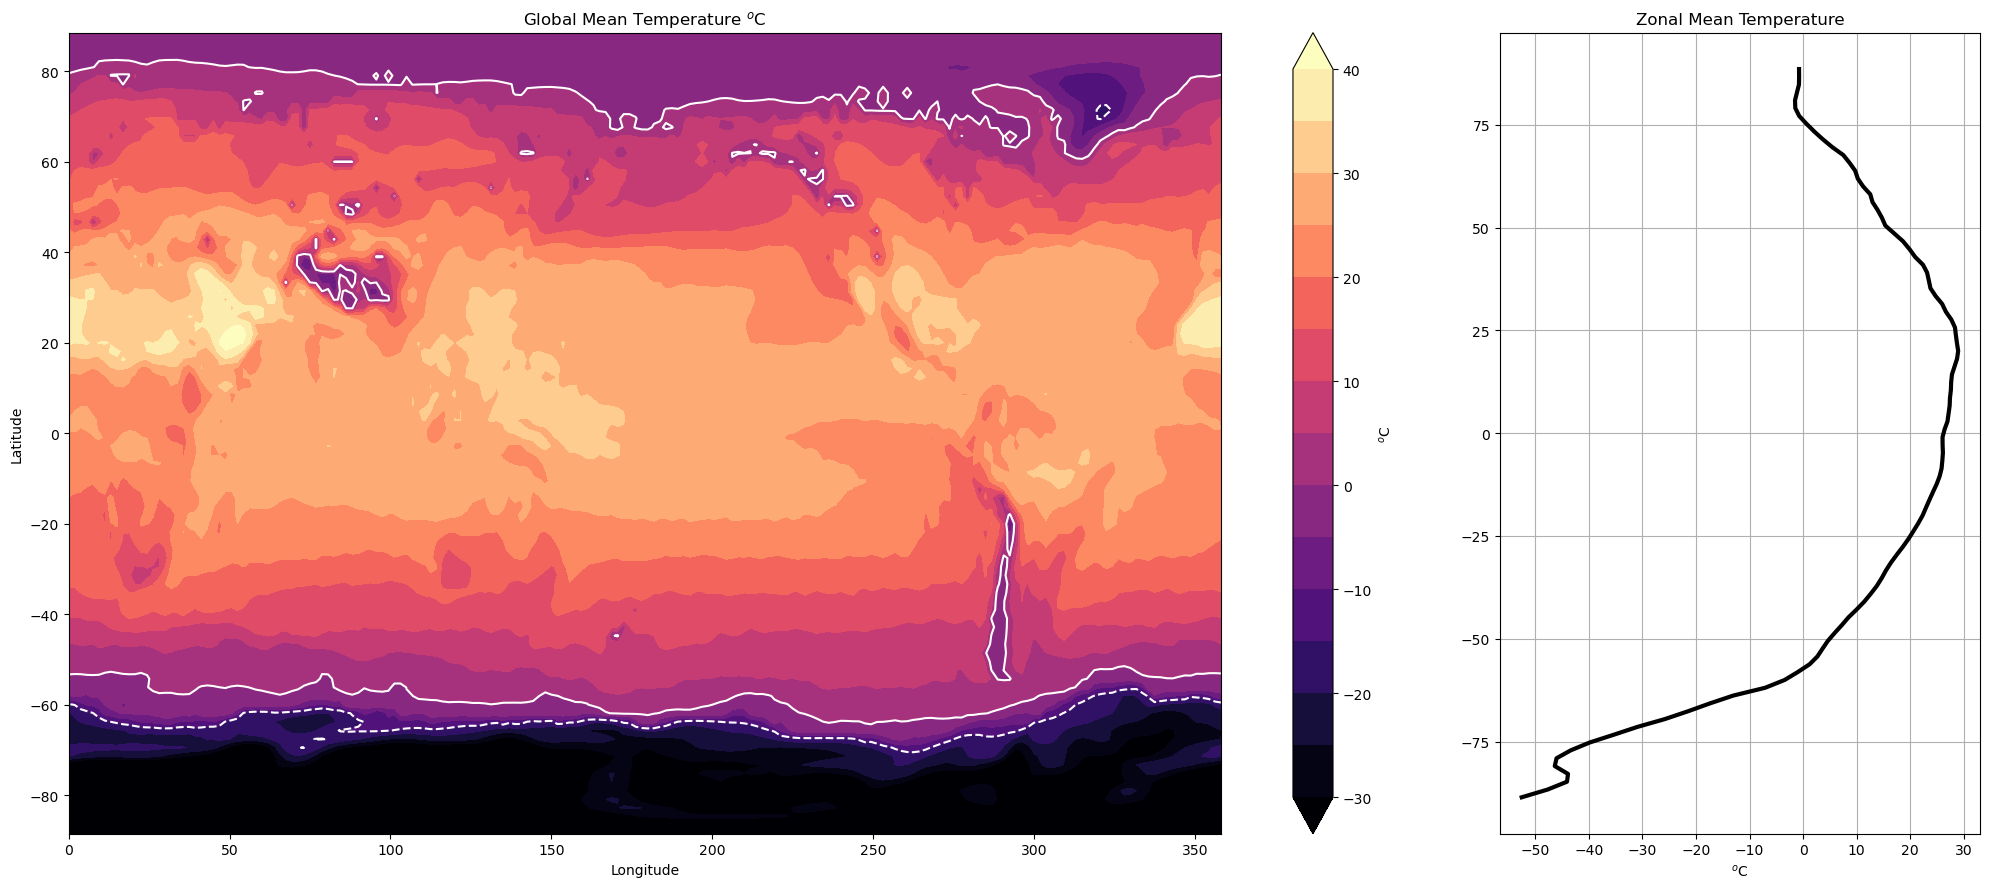

In [216]:
fig, ax = plt.subplots(figsize=(20, 9), ncols=2, gridspec_kw={"width_ratios": [3, 1]})

clevels = np.arange(-30, 45, 5)


cf = ax[0].contourf(lon, lat, temp, clevels, cmap="magma", extend="both")
cf1 = ax[0].contour(cf, levels=cf.levels[3:9:3], colors="white")
ax[0].set(title=r"Global Mean Temperature $^o$C", xlabel="Longitude", ylabel="Latitude")
cbar = fig.colorbar(cf, ax=ax[0])
cbar.ax.set_ylabel(r"$^o$C")

ax[1].plot(mean_temp, lat, color="k", linewidth=3)
ax[1].grid(which="major")
ax[1].margins()
ax[1].set(title="Zonal Mean Temperature", xlabel=r"$^o$C")
fig.tight_layout()

***
# Problem 3: Scatter plots
***
Here we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by log10(depth) and adjust the marker size to be magntiude
4/100. *Follow along with* <a href="https://earth-env-data-science.github.io/assignments/more_matplotlib.html" target = "_blank"> this link </a>.
***

In [217]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash="22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb",
    processor=pooch.Unzip(),
)[0]

earthquakes = np.genfromtxt(fname, delimiter="\t")
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Unzipping contents of 'C:\Users\Gabriel\AppData\Local\pooch\pooch\Cache\031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip' to 'C:\Users\Gabriel\AppData\Local\pooch\pooch\Cache\031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip.unzip'


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_36692\818388671.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(depth)


array([       nan,        nan, 1.25527251, ..., 1.41497335, 0.95424251,
       1.        ])

In [257]:
import matplotlib.ticker as ticker

In [ ]:
ax.set_xscale("log")
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

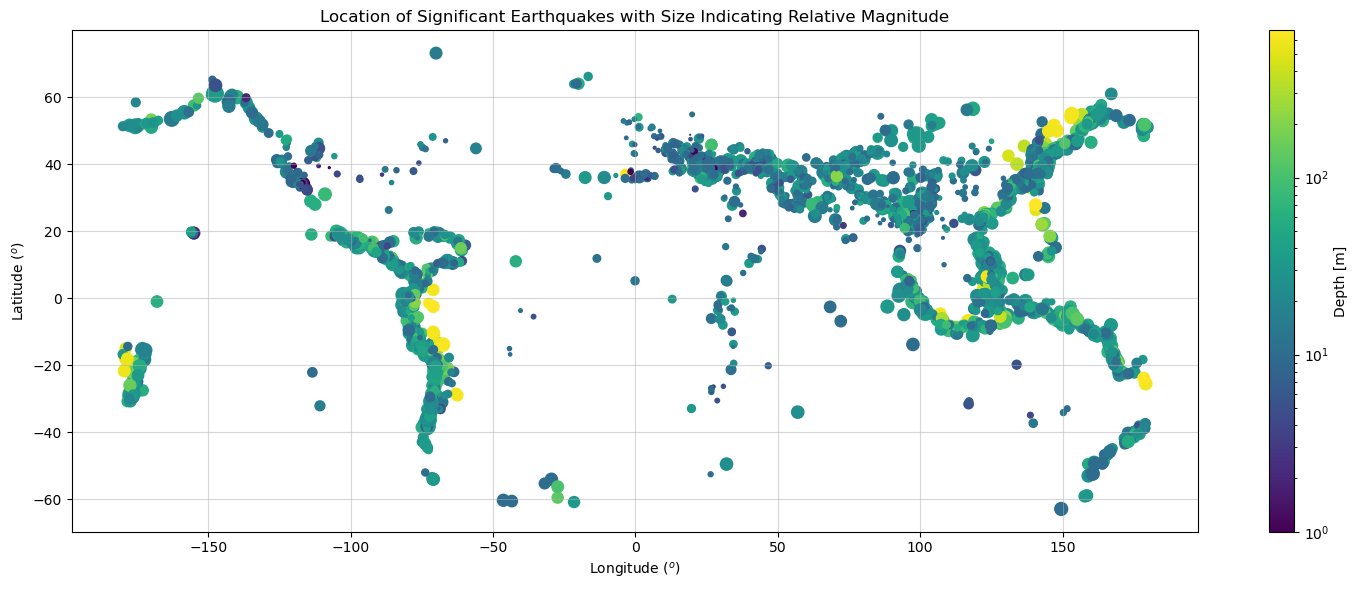

In [269]:
fig, ax = plt.subplots(figsize=(15, 6))
scatter = ax.scatter(longitude, latitude, c=depth, s=magnitude**4 / 50, norm="log")
ax.grid(alpha=0.5)
ax.set(
    title="Location of Significant Earthquakes with Size Indicating Relative Magnitude",
    xlabel=r"Longitude ($^o$)",
    ylabel=r"Latitude ($^o$)",
)
cbar = fig.colorbar(scatter, ax=ax, label="Depth [m]")
fig.tight_layout()